In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sage

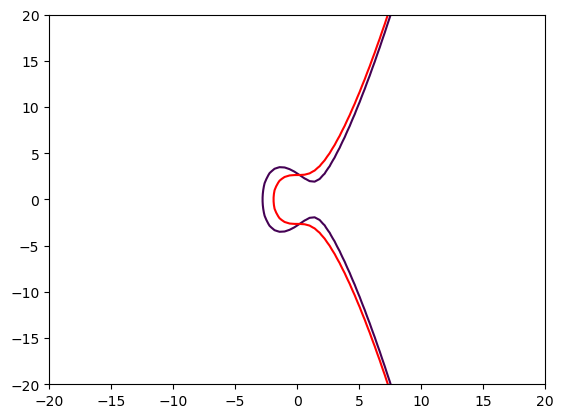

In [6]:

def ecc_r(x):
    return x**3 -5*x +8

def other(x):
    return x**3+7

fig, ax = plt.subplots(dpi=100)
y,x = np.ogrid[-20:20:100j, -20:20:100j]
plt.contour(x.ravel(), y.ravel(), y**2 -ecc_r(x), [0])
plt.contour(x.ravel(), y.ravel(), y**2 -other(x), [0], colors='r')

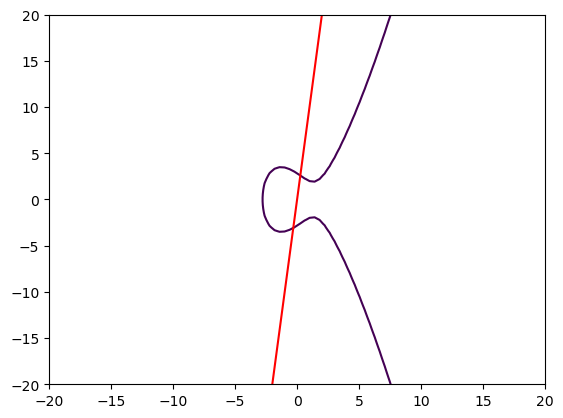

In [7]:
y,x = np.ogrid[-20:20:100j, -20:20:100j]
plt.contour(x.ravel(), y.ravel(), y**2 -ecc_r(x), [0])
plt.contour(x.ravel(), y.ravel(), y-10*x, [0], colors='r')

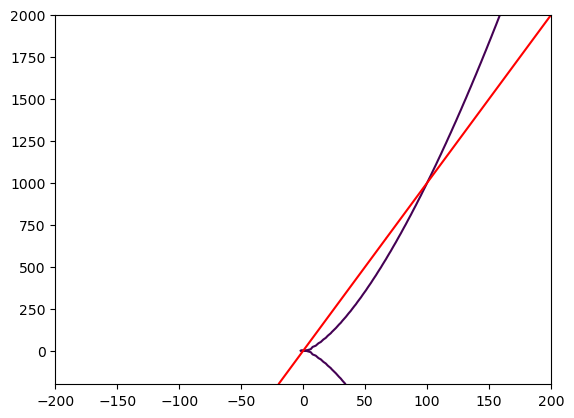

In [8]:
y,x = np.ogrid[-200:2000:100j, -200:200:100j]
plt.contour(x.ravel(), y.ravel(), y**2 -ecc_r(x), [0])
plt.contour(x.ravel(), y.ravel(), y -10*x, [0], colors='r')

In [19]:
def ecc(x, p, a, b):
    assert (4*a**3 + 27*b**2) %p !=0 # non zero discriminant https://en.wikipedia.org/wiki/Elliptic_curve
    return (x**3 + a*x + b) %p 

# taking the sqrt in a finite field means finding elements where y^2  = x^2
def sqrt_f(x, y2, p):
    x2 = x**2 %p
    y = [(i, *y_i) for i, y_i in enumerate([np.nonzero(y2_i == x2)[0] for y2_i in y2]) if y_i.size > 0]
    return y

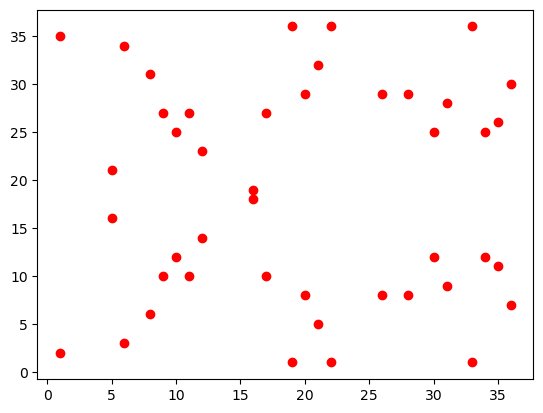

In [22]:
# y^2 = x^3 - 5x + 8 mod(37)
p = 37
x = np.array(range(0,p))

a=-5
b=8

x2 = x**2 %p
y2 = ecc(x,p,a,b)
y = sqrt_f(x,y2,p)

fig = plt.figure(dpi=100)
for y_p in y:
    [plt.scatter(y_p[0],i,color='r') for i in y_p[1:]]


In [23]:
from libnum import has_sqrtmod_prime_power, sqrtmod_prime_power# had to do conda install pip; which pip; pip install libnum cuz libnum is oaf


In [25]:
print(has_sqrtmod_prime_power(8,11,1))
print(has_sqrtmod_prime_power(5,11,1))



False
True


<function ecc_fn.<locals>.f at 0x137559800>
5
x  0 y2  3
inside:  x  0 y2  3
x  1 y2  4
inside:  x  1 y2  4
x  2 y2  0
inside:  x  2 y2  0
x  3 y2  8
x  4 y2  1
inside:  x  4 y2  1
x  5 y2  7
x  6 y2  10
x  7 y2  5
inside:  x  7 y2  5
x  8 y2  9
inside:  x  8 y2  9
x  9 y2  6
x  10 y2  2


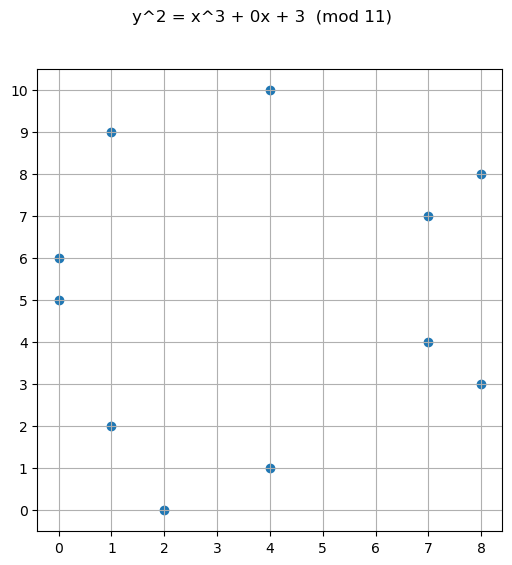

In [55]:
#alternative implementation of sqrt
def ecc_fn(a, b, p):
    def f(x):
        return  (x**3 + a*x  + b ) %p
    return f

def str_ecc_fn(a,b,p):
    fmt = "y^2 = x^3"
    return "y^2 = x^3 + {}x + {}  (mod {})".format(a, b, p)

def generate_points(a,b, p):
    xs = []
    ys = []

    y2 = ecc_fn(a,b,p) 
    #def y2(x):
    #    return (x**3 + 3) % p
    for x in range(0,p):
        y2_val = y2(x)
        print("x " , x, "y2 ", y2(x))
        if has_sqrtmod_prime_power(y2_val, p ,1):
            print("inside: ", "x " , x, "y2 ", y2(x))
            
            roots = sqrtmod_prime_power(y2_val, p, 1)
            # may have two solutions
            for r in roots:
                ys.append(r)
                xs.append(x)
    return xs, ys

l = ecc_fn(1, 3,11)
print(l)
print(l(1))

a = 0
b = 3
p = 11
xs, ys = generate_points(a, b, p)
fig, (ax1) = plt.subplots(1, 1);
fig.suptitle(str_ecc_fn(a,b,p));
fig.set_size_inches(6, 6);
ax1.set_xticks(range(0,11));
ax1.set_yticks(range(0,11));
plt.grid()
plt.scatter(xs, ys)


In [61]:
def double(x: int, y: int, a: int, p:int):
    lambd = ((( 3 * x**2) % p) + pow(2*y, -1, p)) % p
    newx = (lambd**2 - 2*x)%p
    newy = (-lambd*newx + lambd*x -y)%p
    return (newx, newy)

def add_pts(fn, xq:int, yq:int, xp:int, yp:int, p:int, a:int = 0):
    if xq == yq == None:
        return xp, yp
    if xp == yp == None:
        return xq, yq
    assert fn(xq) ==yq**2 %p
    assert fn(xp) ==yp**2 %p

    if xq == xp and yq == yp:
        return double(xq,yq,a,p)
    elif xq == xp:
        return None, None

    lambd = (( yq - yp) * pow(xq - xp, -1, p) ) %p
    xr = (lambd**2 - xp - xq) %p
    yr = (lambd*(xp-xr)-yp)%p
    return xr, yr

next_x, next_y = 4,10
points = [(next_x, next_y)]
a=0
b=3
p=11
fn=ecc_fn(a,b,p)
print(0,4,10)
for i in range(1,2*p):
    next_x, next_y = add_pts(fn, next_x,next_y, 4, 10, p)
    print(i, next_x, next_y)
    points.append((next_x, next_y))
    

0 4 10
1 7 7
2 1 9
3 0 6
4 8 8
5 2 0
6 8 3
7 0 5
8 1 2
9 7 4
10 4 1
11 None None
12 4 10
13 7 7
14 1 9
15 0 6
16 8 8
17 2 0
18 8 3
19 0 5
20 1 2
21 7 4


x  0 y2  3
inside:  x  0 y2  3
x  1 y2  4
inside:  x  1 y2  4
x  2 y2  0
inside:  x  2 y2  0
x  3 y2  8
x  4 y2  1
inside:  x  4 y2  1
x  5 y2  7
x  6 y2  10
x  7 y2  5
inside:  x  7 y2  5
x  8 y2  9
inside:  x  8 y2  9
x  9 y2  6
x  10 y2  2


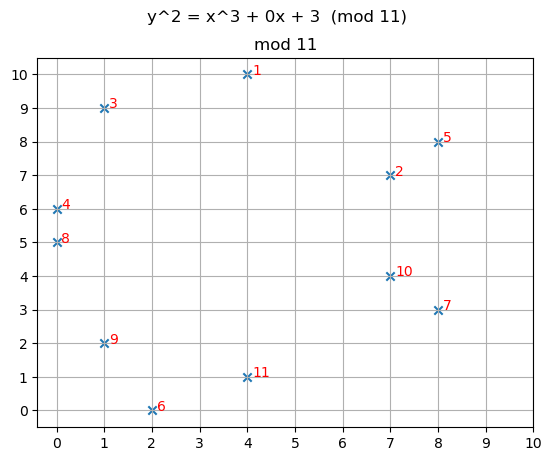

In [65]:
# each point on an elliptic curve can be labeled by a positive integer
xs, ys = generate_points(a,b,p)
fig, ax1 = plt.subplots(1,1)
fig.suptitle(str_ecc_fn(a,b,p))

ax1.set_title("mod {}".format(p))
ax1.scatter(xs,ys,marker="x")
ax1.set_xticks(range(0,p))
ax1.set_yticks(range(0,p))
ax1.grid()

for i in range(0,p):
    plt.annotate(str(i+1), (points[i][0]+0.1,points[i][1]), color="red")

In [67]:
# EVM implementation uses bn128. pip install py-ecc
from py_ecc.bn128 import G1, multiply, add, eq, neg

print("g1: {}".format(G1))
print("g1+g1 = {}".format(add(G1,G1)))

g1: (1, 2)
g1+g1 = (1368015179489954701390400359078579693043519447331113978918064868415326638035, 9918110051302171585080402603319702774565515993150576347155970296011118125764)


In [68]:
assert(add(G1,G1) == multiply(G1,2))

In [79]:
# curve order is number of points on the curve
# field order is the modulo. in general they are not equal

from py_ecc.bn128 import curve_order, field_modulus, G1, multiply, eq
x = 5
# to "get back to x" you have to traverse all the point in the curve
assert(eq(multiply(G1, x), multiply(G1, x + curve_order)))
assert(not eq(multiply(G1, x), multiply(G1, x + field_modulus)))

In [84]:
# for arbitrary integer values we always end up on the curve
m = 2 ** 300 + 21
n = 3 ** 50 + 11

# (m + n) == mG + nG
assert (m > curve_order)
assert (n < curve_order)
assert (m +n > curve_order)

assert eq(multiply(G1, (m+n) % curve_order), add(multiply(G1, m), multiply(G1, n)))
# dont even need the mod curve_order when only using positive integers
assert eq(multiply(G1, m+n), add(multiply(G1, m), multiply(G1, n)))

In [97]:
# basic zero knowledge: "i know x, y such that x+y = 15"
from py_ecc.bn128 import G1, multiply, add
# Prover
secret_x = 5
secret_y = 10
# map from ints to curve points
x = multiply(G1,secret_x)
y = multiply(G1,secret_y)

proof = (x, y, 15)

# verifier
if multiply(G1, proof[2]) == add(proof[0], proof[1]):
    print("not wrong...")
else:
    print("liar!!")

# linear system 23*x=161
secret_x = 7
assert(23*secret_x == 161)

x = multiply(G1, secret_x)
proof = x
# verifier
if multiply(proof,23) == multiply(G1, 161):
    print("correct solution to 23*b = 161")
else:
    print("you know know what you are talking about brah")

# linear system from wikipedia 
# 2x + 3y = 6
# 4x + 9y = 15
# x,y = 3/2,1

sec_x = (3*pow(2,-1,curve_order))
sec_y = 1
x = multiply(G1, sec_x)
y = multiply(G1, sec_y)
proof = (x,y)
# verifier
if ( add(multiply(proof[0], 2), multiply(proof[1],3)) == multiply(G1, 6) 
    and add(multiply(proof[0], 4), multiply(proof[1],9)) == multiply(G1,15)):
    print("accept prover knows solution to linear system from wikipedia")
else:
    print("not a solution to Wiki LE")



not wrong...
correct solution to 23*b = 161
accept prover knows solution to linear system from wikipedia
